In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
Dataset="/content/drive/MyDrive/Signature/BHSig260-Bengali/dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['98', '95', '99', '97', '96', '94', '93', '92', '91', '90', '89', '87', '9', '86', '88', '85', '84', '83', '82', '81', '80', '78', '77', '79', '8', '76', '75', '74', '73', '72', '7', '68', '70', '69', '71', '67', '66', '65', '64', '63', '59', '61', '62', '6', '60', '58', '57', '56', '55', '54', '5', '50', '52', '53', '51', '49', '48', '47', '46', '45', '43', '42', '41', '44', '40', '4', '39', '38', '37', '36', '35', '34', '29', '28', '31', '30', '3', '33', '32', '27', '26', '25', '24', '23', '21', '22', '19', '20', '2', '18', '17', '16', '15', '14', '13', '1', '0', '12', '11', '10']


In [6]:
images = []
classNo = []
classes = 100
epochs_val = 50
batch_size = 32
imageDimensions = (360,100,3)

In [7]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_test.npy')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 360, 100, 3) (1080, 360, 100, 3) (4320, 100) (1080, 100)


In [8]:
from keras.models import Model
from keras.applications.efficientnet import EfficientNetB5
from keras.applications.efficientnet import preprocess_input

In [9]:
efficient_net = EfficientNetB5(input_shape=imageDimensions,
                               weights='imagenet',
                               include_top=False)

for layer in efficient_net.layers:
  layer.trainable = False

115263384/115263384 [==============================] - 1s 0us/step


In [10]:
# No of layers
x = Flatten()(efficient_net.output)
prediction = Dense(classes, activation='softmax')(x)

# create a model object
model = Model(inputs=efficient_net.input, outputs=prediction)

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 360, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 360, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 360, 100, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 360, 100, 3)  0           ['normalization[0][0]']      

In [12]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))

Epoch 1/50
135/135 [==============================] - 62s 274ms/step - loss: 22.9806 - accuracy: 0.3711 - val_loss: 6.0808 - val_accuracy: 0.6278
Epoch 2/50
135/135 [==============================] - 32s 240ms/step - loss: 6.7018 - accuracy: 0.6706 - val_loss: 5.3310 - val_accuracy: 0.7417
Epoch 3/50
135/135 [==============================] - 32s 239ms/step - loss: 4.4834 - accuracy: 0.7738 - val_loss: 6.5297 - val_accuracy: 0.7213
Epoch 4/50
135/135 [==============================] - 28s 204ms/step - loss: 3.5508 - accuracy: 0.8153 - val_loss: 5.0539 - val_accuracy: 0.7704
Epoch 5/50
135/135 [==============================] - 27s 204ms/step - loss: 3.5989 - accuracy: 0.8301 - val_loss: 4.4884 - val_accuracy: 0.8000
Epoch 6/50
135/135 [==============================] - 27s 204ms/step - loss: 2.6884 - accuracy: 0.8632 - val_loss: 4.5785 - val_accuracy: 0.8157
Epoch 7/50
135/135 [==============================] - 27s 204ms/step - loss: 2.8860 - accuracy: 0.8699 - val_loss: 4.8080 - val_a

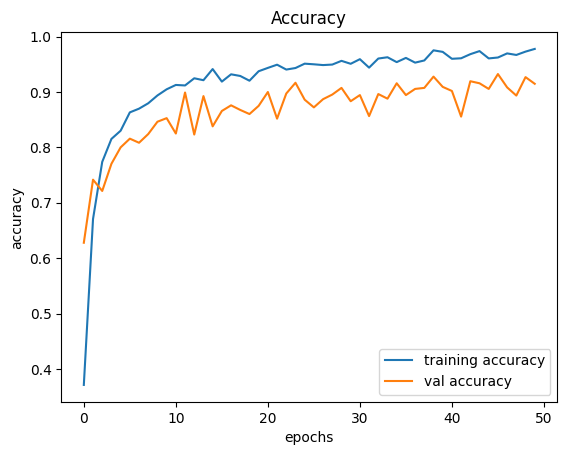

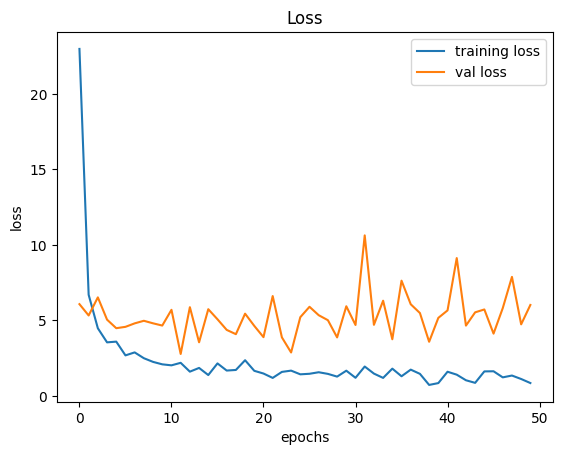

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9879629611968994


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.914814829826355


In [16]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 9s 162ms/step


In [17]:
actual=np.argmax(y_test, axis = 1)

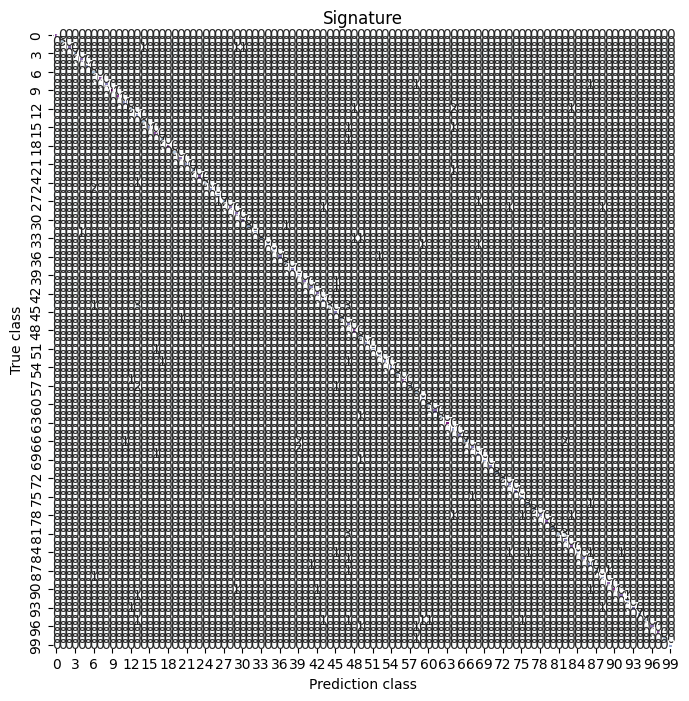

In [18]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [19]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89        15
           3       1.00      1.00      1.00         7
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        10
           6       0.60      1.00      0.75         6
           7       1.00      1.00      1.00        14
           8       1.00      0.85      0.92        13
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        16
          11       0.91      1.00      0.95        10
          12       0.75      0.60      0.67        10
          13       0.56      1.00      0.71        10
          14       0.86      1.00      0.92         6
          15       1.00      0.83      0.91        12
          16       0.88      1.00      0.93        14
          17       0.88    